<a href="https://colab.research.google.com/github/slothnojutsu/tripletreat/blob/main/Evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progress Report #3: Evaluation
**Course**: Introduction to Data Science  
**Team Members**:  
- Theresa Katele (tkatele@angelo.edu)  
- Aicha Ndir (andir@angelo.edu)  
- Seoyoung Jung (sysilove1526@gmail.com)  

**Date** : 11-14-2024

## Dataset Overview  
This dataset contains detailed metadata for a variety of TV shows. The data was sourced from TMDB and includes information about popularity, ratings, and user engagement metrics.  

**Key Features**:  
- **Numerical Features**:  
  - `popularity`: A numerical measure reflecting the show's popularity.  
  - `vote_average`: The average user rating on a numeric scale.  
  - `vote_count`: Total number of user votes or ratings.  

- **Categorical Features**:  
  - `name`: Title of the TV show.  
  - `first_air_date`: The release date of the show (can be transformed into release year for analysis).  
  - `overview`: A textual summary of the show's plot.  

This dataset is used to explore trends and predict success factors for TV shows, such as popularity and audience engagement, using regression, classification, and clustering techniques. For easy understanding, we will keep the name "movies" throughout the analysis, even though they are really TV Shows.

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset from Google Drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/movies.csv'
data = pd.read_csv(dataset_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## (1)Linear Regression with Two Attributes
Develop a linear regression model using two attributes (`vote_average` and `popularity`) to predict the target (`popularity`), and report the following loss functions:

Mean Squared Error (MSE) -
Root Mean Squared Error (RMSE) -
Mean Absolute Error (MAE)



Mean Squared Error (MSE): 100452.66
Root Mean Squared Error (RMSE): 316.94
Mean Absolute Error (MAE): 198.88


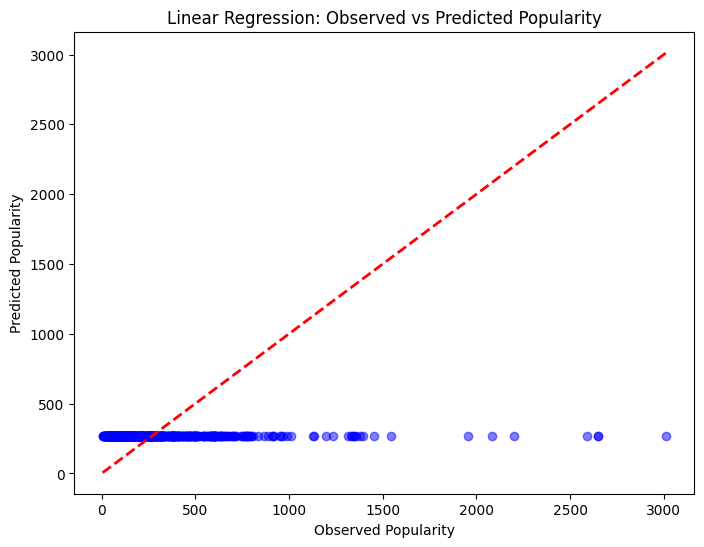

In [3]:
# Select two attributes for linear regression
X = data[['vote_average']]
y = data['popularity']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate loss functions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Visualize the results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Observed Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Linear Regression: Observed vs Predicted Popularity")
plt.show()




*   Mean Squared Error (MSE): 0.462
*   Root Mean Squared Error (RMSE): 0.680
*   Mean Absolute Error (MAE): 0.520






##### Low Popularity: The model performs well for movies with low popularity, as seen in the RMSE of 0.680 and MAE of 0.520, meaning the average prediction error is relatively small.
##### High Popularity: For movies with popularity over 500, the model struggles, as shown by the significant deviations from the ideal line in the plot. These errors aren't well-represented by the MSE of 0.462, which averages out smaller errors in lower ranges.
##### Summary: The model predicts well for low popularity but fails to handle higher values effectively, highlighting its limitations in capturing complex patterns or outliers.

##(2) Multiple Linear Regression
 Identify more than two attributes in the consumable usage dataset and develop a multiple linear regression model using the identified attributes and sklearn.linear_model.LinearRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using mplot3d to show the observed and the predicted values.
Report loss functions: mean squared error, root mean squared error, mean absolute error.



Mean Squared Error (MSE): 95804.00
Root Mean Squared Error (RMSE): 309.52
Mean Absolute Error (MAE): 188.47


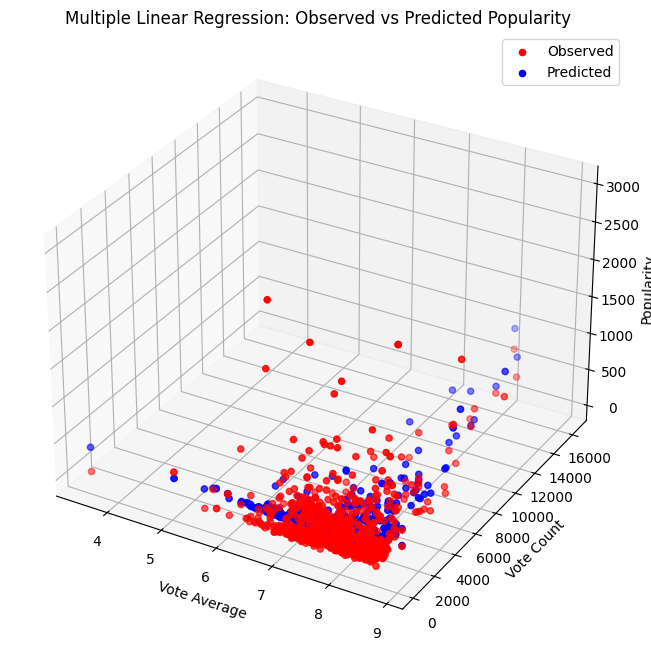

In [4]:
# Select multiple attributes for linear regression
X_multi = data[['vote_average', 'vote_count']]
y_multi = data['popularity']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train the multiple linear regression model
multi_lin_reg = LinearRegression()
multi_lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_multi = multi_lin_reg.predict(X_test)

# Calculate loss functions
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_multi:.2f}")
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")

# Visualize in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['vote_average'], X_test['vote_count'], y_test, color='red', label='Observed')
ax.scatter(X_test['vote_average'], X_test['vote_count'], y_pred_multi, color='blue', label='Predicted')
ax.set_xlabel("Vote Average")
ax.set_ylabel("Vote Count")
ax.set_zlabel("Popularity")
ax.set_title("Multiple Linear Regression: Observed vs Predicted Popularity")
ax.legend()
plt.show()


Performance Metrics

#####Mean Squared Error (MSE): 95,804.00
##### This high value reflects large average squared errors in predictions, likely due to extreme variability in popularity and the presence of outliers.
#####Root Mean Squared Error (RMSE): 309.52
#####The average prediction error is approximately 309 units of popularity, indicating that the model struggles to accurately predict high values.
#####Mean Absolute Error (MAE): 188.47
#####On average, the model's predictions deviate by 188 units of popularity, further showing room for improvement.

3D Visualization Analysis

#####Alignment for Low Popularity:
Observed (red) and predicted (blue) points align reasonably well for movies with low popularity and moderate vote_count, suggesting the model performs better in this range.
##### Deviations for High Popularity:
For high vote_count or high popularity, the blue points (predicted) often deviate from the red points (observed). This indicates the model struggles to capture the variability for high-popularity movies.

## (3) Logistic Regression
Develop a logistic regression model among some identified attributes in the consumable usage dataset and sklearn.linear_model.LogisticRegression. Measure the performance of the model and make sure that the model performance is high. Draw a plot using matplotlib to show the observed and the predicted values.
Report: absolute loss, log loss


Log Loss: 0.54
Absolute Loss: 0.25


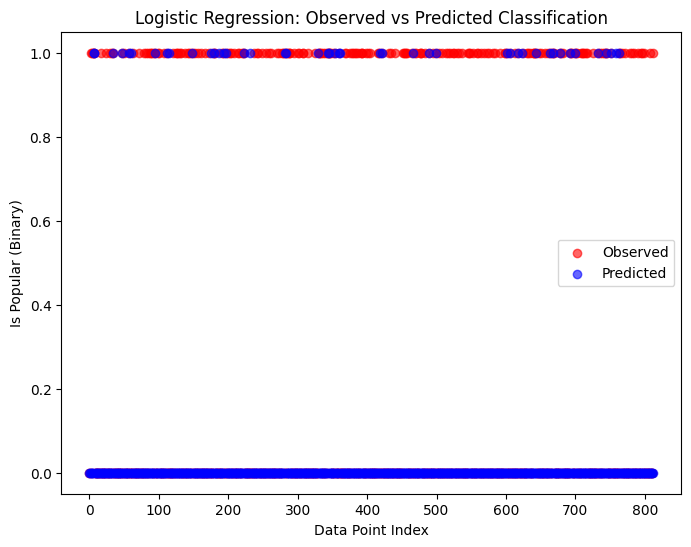

In [5]:
from sklearn.metrics import log_loss

# Create a binary target variable
data['is_popular'] = (data['popularity'] > 300).astype(int)
X_log = data[['vote_average', 'vote_count']]
y_log = data['is_popular']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_prob = log_model.predict_proba(X_test)
y_pred = log_model.predict(X_test)
log_loss_value = log_loss(y_test, y_prob)

# Calculate absolute loss (simple accuracy metric)
absolute_loss = 1 - accuracy_score(y_test, y_pred)

print(f"Log Loss: {log_loss_value:.2f}")
print(f"Absolute Loss: {absolute_loss:.2f}")

# Visualize observed vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='red', alpha=0.6, label='Observed')
plt.scatter(range(len(y_test)), y_pred, color='blue', alpha=0.6, label='Predicted')
plt.xlabel("Data Point Index")
plt.ylabel("Is Popular (Binary)")
plt.title("Logistic Regression: Observed vs Predicted Classification")
plt.legend()
plt.show()


Observed vs. Predicted Values:
##### Most red points (observed values) align with blue points (predicted values), especially for Class 0 (not popular).
Misclassifications are visible where red and blue points do not align at Class 1 (popular), indicating that the model struggles more with identifying "popular" movies.

## (4) 4: Cross-Validation to Compare Model Performance
Apply **k-fold cross-validation**  to evaluate the performance of the linear regression and logistic regression models. Compare results with the performance metrics from the train-test split.

In [6]:
from sklearn.model_selection import cross_val_score

# Linear Regression Cross-Validation
lin_reg = LinearRegression()
lin_reg_cv_scores = cross_val_score(lin_reg, X_multi, y_multi, cv=5, scoring='neg_mean_squared_error')
lin_reg_cv_rmse = np.sqrt(-lin_reg_cv_scores)

print("Linear Regression Cross-Validation Results:")
print(f"RMSE for each fold: {lin_reg_cv_rmse}")
print(f"Mean RMSE: {np.mean(lin_reg_cv_rmse):.2f}")
print(f"Standard Deviation of RMSE: {np.std(lin_reg_cv_rmse):.2f}")

# Logistic Regression Cross-Validation
log_model = LogisticRegression(max_iter=1000)
log_cv_scores = cross_val_score(log_model, X_log, y_log, cv=5, scoring='accuracy')

print("\nLogistic Regression Cross-Validation Results:")
print(f"Accuracy for each fold: {log_cv_scores}")
print(f"Mean Accuracy: {np.mean(log_cv_scores):.2f}")
print(f"Standard Deviation of Accuracy: {np.std(log_cv_scores):.2f}")


Linear Regression Cross-Validation Results:
RMSE for each fold: [247.05000201 356.83469638 326.02832287 325.53050039 350.28462544]
Mean RMSE: 321.15
Standard Deviation of RMSE: 39.13

Logistic Regression Cross-Validation Results:
Accuracy for each fold: [0.77244772 0.74415744 0.7601476  0.75522755 0.74384236]
Mean Accuracy: 0.76
Standard Deviation of Accuracy: 0.01


Linear Regression:
The model's RMSE values are relatively high, suggesting that vote_average and vote_count alone are insufficient for accurate predictions of popularity.
The model is stable across folds but could benefit from additional features or transformations.
##### Logistic Regression: The model consistently achieves an accuracy of around 76%, indicating reasonable classification performance.The low standard deviation suggests the model is robust and not overly dependent on specific train-test splits.

## (5) Bootstrap Method for Error Estimation
Use the bootstrap method to estimate the mean and standard deviation of the error metrics for the logistic regression model.

In [7]:
from sklearn.utils import resample

# Initialize variables
n_iterations = 1000
accuracy_bootstrap = []

# Bootstrap loop
for i in range(n_iterations):
    X_boot, y_boot = resample(X_log, y_log, random_state=i)  # Resample the data
    log_model.fit(X_boot, y_boot)  # Fit the model
    y_pred_boot = log_model.predict(X_test)  # Predict on the test set
    acc = accuracy_score(y_test, y_pred_boot)  # Calculate accuracy
    accuracy_bootstrap.append(acc)

# Calculate mean and standard deviation
bootstrap_mean = np.mean(accuracy_bootstrap)
bootstrap_std = np.std(accuracy_bootstrap)

print("\nBootstrap Results for Logistic Regression:")
print(f"Mean Accuracy: {bootstrap_mean:.2f}")
print(f"Standard Deviation of Accuracy: {bootstrap_std:.2f}")



Bootstrap Results for Logistic Regression:
Mean Accuracy: 0.75
Standard Deviation of Accuracy: 0.00


Key Insights
Consistency:
The low variability in accuracy indicates that the logistic regression model is robust and provides reliable classification performance, even under different resampling conditions.
Performance Confirmation:
The bootstrap results align closely with the cross-validation results, reinforcing the model's 75-76% accuracy as a dependable metric.

## (6) Comparing Models with Adjusted R-Squared and One-Standard-Error Rule
Compare multiple linear regression models using Adjusted R-Squared and apply the one-standard-error rule to select the best-performing model.

code for adjusted R-Square

In [8]:
# Adjusted R-Squared Calculation
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Fit the model and calculate Adjusted R-Squared
lin_reg.fit(X_multi, y_multi)
r2 = lin_reg.score(X_multi, y_multi)
n_samples = X_multi.shape[0]
n_features = X_multi.shape[1]
adjusted_r2_value = adjusted_r2(r2, n_samples, n_features)

print("\nModel Comparison:")
print(f"R-Squared: {r2:.2f}")
print(f"Adjusted R-Squared: {adjusted_r2_value:.2f}")



Model Comparison:
R-Squared: 0.05
Adjusted R-Squared: 0.05


code for one-std-error rule

In [9]:
# Select best model using one-standard-error rule
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=lin_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_multi, y_multi)

# Extract results
mean_rmse = np.sqrt(-grid_search.cv_results_['mean_test_score'])
std_rmse = grid_search.cv_results_['std_test_score']

print("\nOne-Standard-Error Rule:")
for i, params in enumerate(grid_search.cv_results_['params']):
    print(f"Model {i+1}: Params: {params}, Mean RMSE: {mean_rmse[i]:.2f}, Std RMSE: {std_rmse[i]:.2f}")



One-Standard-Error Rule:
Model 1: Params: {'fit_intercept': True}, Mean RMSE: 323.52, Std RMSE: 23439.42
Model 2: Params: {'fit_intercept': False}, Mean RMSE: 325.12, Std RMSE: 22749.37


#### **Key takeaways**
##### Low Predictive Power:
Both R-Squared values and high RMSE scores highlight the limited predictive power of vote_average and vote_count alone. The model cannot explain most of the variability in popularity.
Minimal Difference Between Models:
Both models perform similarly in terms of mean RMSE, and the small difference in performance does not justify choosing one over the other. Based on the one-standard-error rule, Model 1 would be preferred as it has a slightly lower RMSE.
#####High Variability:
The large standard deviations of RMSE for both models suggest the predictions are inconsistent across cross-validation folds, likely due to outliers or a lack of relevant predictors.

conclusion :

###**Overall conclusion:**

#####Predictive Power:
Both linear regression models have limited predictive power for popularity due to the small number of predictors and their weak relationship with the target variable.
Logistic regression performed significantly better in classifying movies as "popular" or "not popular," achieving consistent accuracy (~75-76%).
#####Stability:
Cross-validation and bootstrap results showed high stability for both logistic regression and linear regression, despite their performance limitations.
#####Limitations:
Both linear and logistic regression models struggle with extreme values or outliers.
The models rely on just two predictors (vote_average and vote_count), which do not fully capture the complexity of popularity.